In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.utils

sns.set_style('darkgrid')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # to suppress future warning 




In [2]:
df = pd.read_csv('NFA 2019 public_data.csv')
df.head()

/home/abiolaks/miniconda3/envs/ds-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


_Display the first five row to see if_
* The column make sense
* Do value in the column make sense
* what types of classes are there

In [3]:
df.tail()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
72181,World,2016,5001,BiocapTotGHA,3.984702e+09,1.504757e+09,5111762779.0,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
72182,World,2016,5001,EFConsPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72183,World,2016,5001,EFConsTotGHA,3.984702e+09,1.046937e+09,2042179333.0,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
72184,World,2016,5001,EFProdPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72185,World,2016,5001,EFProdTotGHA,3.984702e+09,1.046937e+09,2042179333.0,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A


_The country should contain list of country names , what does the world represent in the data_

In [4]:
# checking the number of observation and feature in the dataset
df.shape

(72186, 12)

In [5]:
# column datatypes
df.dtypes

country            object
year                int64
country_code        int64
record             object
crop_land         float64
grazing_land      float64
forest_land        object
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
QScore             object
dtype: object

_The forest_land feature is not in the right data type , it need to converted into float__ we will deal with this later

__II.Distributions__
_plotting the distributions of the features in the dataset__
__Here are a few things to look out for:__
* Distribution that don't make sense
* Potential outliers that don't make sense
* sparse data
* Numeric features that should be categorical
* Features  that should be binary
* Boundaries that don't make sense

In [6]:
df.describe()

,year,country_code,crop_land,grazing_land,fishing_ground,built_up_land,carbon,total
count,72186.000000,72186.000000,5.171400e+04,5.171400e+04,5.171300e+04,5.171300e+04,5.171300e+04,7.217700e+04
mean,1990.263154,155.618915,1.920772e+07,1.352875e+07,1.004860e+07,1.984737e+06,3.072609e+07,7.792960e+07
std,16.018761,390.261979,1.685819e+08,1.294180e+08,1.081375e+08,1.730488e+07,3.989630e+08,7.455443e+08
min,1961.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.876963e-02
25%,1977.000000,59.000000,3.581080e-01,1.948302e-01,8.005409e-02,3.786298e-02,0.000000e+00,1.894023e+00
50%,1991.000000,121.000000,3.251810e+00,9.978667e+00,6.154094e+00,2.044437e-01,0.000000e+00,8.292253e+03
75%,2004.000000,193.000000,3.610817e+06,1.734192e+06,9.450000e+05,3.867180e+05,1.915736e+01,1.532959e+07
max,2016.000000,5001.000000,3.984702e+09,3.417089e+09,2.979605e+09,4.726163e+08,1.257160e+10,2.061182e+10


_From the above the distribution we can see presence of missing values in crop_land, grazing_land, fishing_ground, built_up_land and carbon features__

In [7]:
# summarizing the categorical features
df.describe(include=['object'])

,country,record,forest_land,QScore
count,72186,72186,51714,72185
unique,193,8,49103,5
top,World,BiocapTotGHA,0,3A
freq,448,9024,180,51481


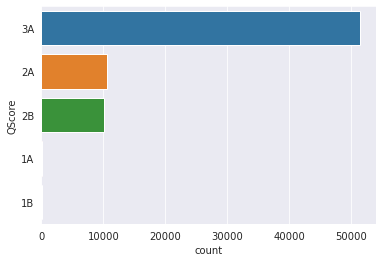

In [8]:
# Bar plot for exterior_walls'
sns.countplot(y='QScore', data=df)
plt.show()

* _There appears from the bar chart above no values for 1A and 1B_
* _There appears to be presence of imbalance class_

## Segmentations
_obeserving the relationship between categorical and numerical features_

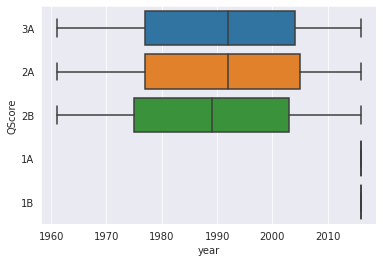

In [9]:
# segment target by the year
sns.boxplot(y='QScore', x='year', data=df)
plt.show()

In [10]:
correlations = df.corr()

In [11]:
correlations

,year,country_code,crop_land,grazing_land,fishing_ground,built_up_land,carbon,total
year,1.000000,-0.007549,0.016051,-0.006314,-0.004076,0.035558,0.019156,0.006528
country_code,-0.007549,1.000000,0.642240,0.592193,0.528693,0.577763,0.446023,0.654637
crop_land,0.016051,0.642240,1.000000,0.722896,0.612383,0.963471,0.764573,0.965973
grazing_land,-0.006314,0.592193,0.722896,1.000000,0.965757,0.654255,0.338858,0.816314
fishing_ground,-0.004076,0.528693,0.612383,0.965757,1.000000,0.548781,0.211500,0.722029
built_up_land,0.035558,0.577763,0.963471,0.654255,0.548781,1.000000,0.752543,0.913638
carbon,0.019156,0.446023,0.764573,0.338858,0.211500,0.752543,1.000000,0.783386
total,0.006528,0.654637,0.965973,0.816314,0.722029,0.913638,0.783386,1.000000


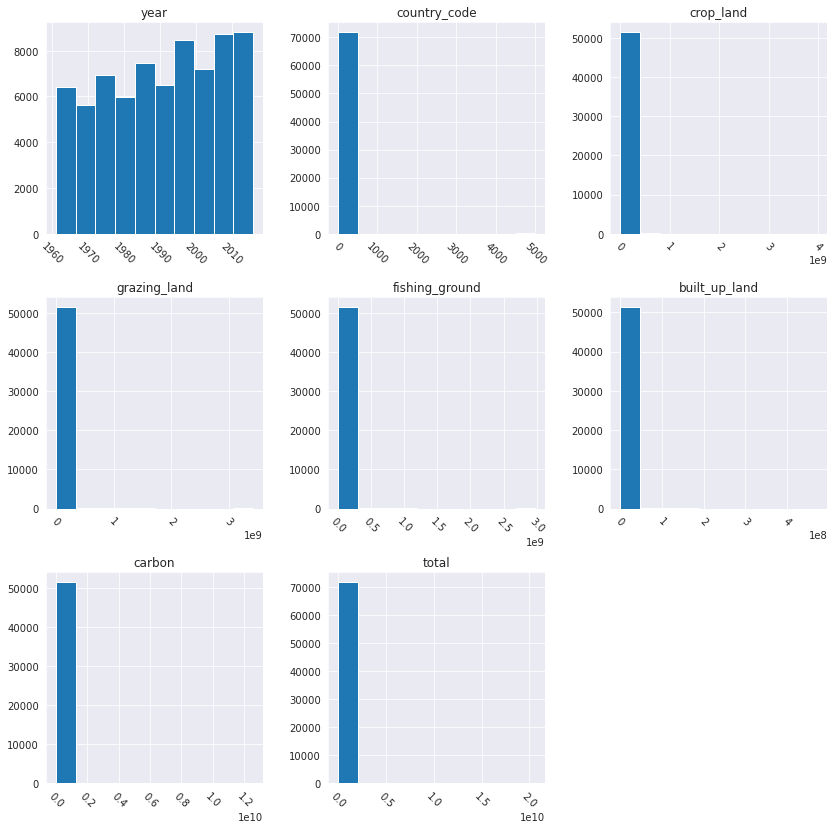

In [12]:
# Plot histogram grid
df.hist(figsize=(14,14), xrot=-45)

# Clear the text "residue"
plt.show()


_From the above distribution most of the values of the feature seems to be close or around 0 taking and as a result the the distribution of the values is unnoticeable- let's take the log transformation of the y axis_

In [12]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1

# Option 2: Mask of False/True
# mask = np.zeros_like(correlations, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True


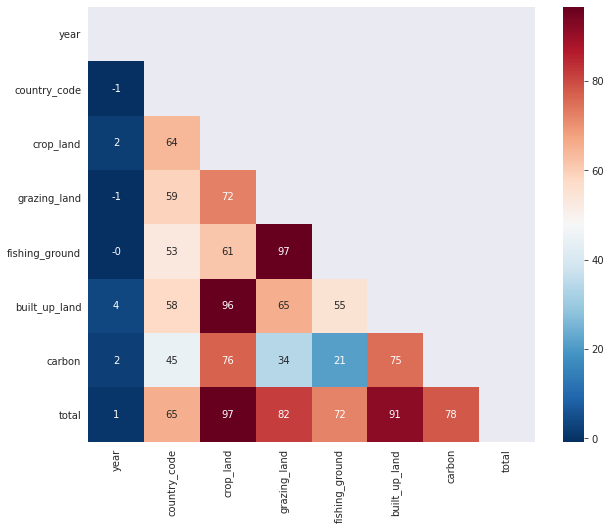

In [14]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            mask=mask)
plt.show()

_the feature seems to be highly correlated with the other features so it can be have the though of removing this__
* crop_land is highly correlated with buil_up_land
* grazing land and fishing_ground seems to highly correlated

In [3]:
# checking the distribution of the value in the target
df.QScore.value_counts()

3A    51481
2A    10576
2B    10096
1A       16
1B       16
Name: QScore, dtype: int64

In [4]:
# checking for missing values
df.isna().sum() 

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

In [6]:
# droppoing missing values
df = df.dropna()
df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

In [7]:
# checking the target variable
df.QScore.value_counts()

3A    51473
2A      224
1A       16
Name: QScore, dtype: int64

_presence of an imbalance class_

In [8]:
# converting this into a binary classification problem
df['QScore'] = df['QScore'].replace('1A', '2A')

In [9]:
df.QScore.value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

In [19]:
# since 3A is so high less perform undersampling
df_2A = df[df.QScore == '2A']
df_3A = df[df.QScore == '3A'].sample(350)
# creating a new dataset with a fairly balance dataset
data_df = df_2A.append(df_3A)



In [20]:
# shuffle the newly created dataset
data_df = sklearn.utils.shuffle(data_df)


In [21]:
data_df.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
63905,United Arab Emirates,1988,225,EFProdTotGHA,9.268401e+04,7.419113e+03,4431.773163,1.231512e+06,0.000000e+00,1.623916e+07,1.757521e+07,3A
9042,Burundi,2014,29,BiocapPerCap,2.323044e-01,6.635939e-02,0.009445314,7.993529e-03,3.636402e-02,0.000000e+00,3.524666e-01,3A
19169,Equatorial Guinea,2016,61,AreaTotHA,1.800000e+05,1.040000e+05,1556400,1.031800e+06,4.772040e+04,0.000000e+00,2.919920e+06,2A
41999,Mongolia,2016,141,EFProdTotGHA,5.633173e+05,1.616171e+07,343305.3159,2.314624e+01,1.802586e+05,6.218086e+06,2.346670e+07,2A
43749,Netherlands,1989,150,BiocapTotGHA,4.153094e+06,7.964738e+05,1133334.65,7.214168e+06,1.096261e+06,0.000000e+00,1.439333e+07,3A


In [22]:
# reseting the index column
data_df = data_df.reset_index(drop=True)

In [23]:
data_df.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,United Arab Emirates,1988,225,EFProdTotGHA,9.268401e+04,7.419113e+03,4431.773163,1.231512e+06,0.000000e+00,1.623916e+07,1.757521e+07,3A
1,Burundi,2014,29,BiocapPerCap,2.323044e-01,6.635939e-02,0.009445314,7.993529e-03,3.636402e-02,0.000000e+00,3.524666e-01,3A
2,Equatorial Guinea,2016,61,AreaTotHA,1.800000e+05,1.040000e+05,1556400,1.031800e+06,4.772040e+04,0.000000e+00,2.919920e+06,2A
3,Mongolia,2016,141,EFProdTotGHA,5.633173e+05,1.616171e+07,343305.3159,2.314624e+01,1.802586e+05,6.218086e+06,2.346670e+07,2A
4,Netherlands,1989,150,BiocapTotGHA,4.153094e+06,7.964738e+05,1133334.65,7.214168e+06,1.096261e+06,0.000000e+00,1.439333e+07,3A


In [24]:
data_df.shape

(590, 12)

In [25]:
data_df.QScore.value_counts()

3A    350
2A    240
Name: QScore, dtype: int64

In [26]:
# more preprocessing
data_df = data_df.drop(columns=['country_code', 'country', 'year'])
X = data_df.drop(columns='QScore')
y = data_df['QScore']

In [27]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train.value_counts()

3A    242
2A    171
Name: QScore, dtype: int64

In [31]:
# encode categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train.record = encoder.fit_transform(x_train.record)
x_test.record = encoder.transform(x_test.record)
 


/home/abiolaks/miniconda3/envs/ds-env/lib/python3.9/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
# addressing imbalance in the dataset using smote
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)


In [33]:
# normalizing the dataset amd drop the record that has been encoded to add it later
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
normalized_train_df = scaler.fit_transform(x_train_balanced.drop(columns=['record']))


In [34]:
type(normalized_train_df)

numpy.ndarray

In [35]:
# turning the normalized dataset to a dataframe from numpy array

normalized_train_df = pd.DataFrame(normalized_train_df, columns=x_train_balanced.drop(columns=['record']).columns)


In [36]:
normalized_train_df.head()

,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total
0,1.368492e-10,1.448853e-10,1.078985e-10,2.374738e-10,7.005926e-11,2.602300e-08,5.761334e-10
1,8.092311e-05,4.006294e-04,1.200628e-04,2.868774e-03,8.190210e-05,0.000000e+00,4.020550e-04
2,1.766494e-04,5.898185e-04,5.081489e-05,9.581657e-05,5.181814e-04,1.704587e-02,4.802474e-04
3,1.140349e-10,3.776018e-10,3.367665e-11,2.823951e-10,1.395612e-10,1.828240e-09,1.433379e-10
4,7.468980e-11,1.524848e-09,2.222662e-09,2.166726e-09,1.093665e-10,0.000000e+00,1.421851e-09


In [37]:
# adding the endoded recoded columns to the normalized df
normalized_train_df['record'] = x_train_balanced['record']

In [38]:
x_test = x_test.reset_index(drop=True)
normalized_test_df = scaler.transform(x_test.drop(columns=['record']))

normalized_test_df = pd.DataFrame(normalized_test_df, columns=x_test.drop(columns=['record']).columns)
normalized_test_df['record'] = x_test['record']

In [39]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalized_train_df, y_balanced)

#returns

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

## Measuring Performance of the model

In [40]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [41]:
y_balanced.shape


(484,)

In [42]:
normalized_train_df.shape

(484, 8)

In [43]:
new_predictions = log_reg.predict(normalized_test_df)

In [44]:
normalized_test_df.shape

(177, 8)

In [45]:
normalized_test_df.columns

Index(['crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon', 'total', 'record'],
      dtype='object')

In [46]:
normalized_train_df.columns

Index(['crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon', 'total', 'record'],
      dtype='object')

In [47]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 58


In [48]:
# confusion matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=['2A', '3A'])
cnf_mat

array([[ 8, 61],
       [13, 95]])

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalized_train_df, y_balanced, cv=5, scoring='f1_macro')
scores

array([0.49870801, 0.42589962, 0.47510823, 0.4432398 , 0.53986928])

In [50]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0


F1: 18


## K-Fold Cross Validation

In [59]:
from sklearn.model_selection import  KFold
# splitting the normalized dataFrame into K ssample
kf = KFold(n_splits= 5)

# normalizing the splitted dataFrame
kf.split(normalized_train_df)
# a list to hold the f1 score for each split
f1_scores = []

# run for every split
for train_index, test_index in kf.split(normalized_train_df):
    x_train, x_test = normalized_train_df.iloc[train_index],normalized_train_df.iloc[test_index]
    y_train, y_test = y_balanced[train_index], y_balanced[test_index]

    
    model = LogisticRegression().fit(x_train, y_train)

# save result to list
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='2A')*100)

In [52]:
f1_scores

[59.854014598540154,
 60.86956521739131,
 58.39416058394161,
 56.2962962962963,
 0.0]

In [60]:
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('Precision: {}'.format(round(precision*100), 2))

ValueError: Found input variables with inconsistent numbers of samples: [96, 177]

In [58]:
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('Recall: {}'.format(round(recall*100), 2)) #prints 51.0 



ValueError: Found input variables with inconsistent numbers of samples: [96, 177]

In [61]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

f1_scores = []

# run for every split

for train_index, test_index in skf.split(normalized_train_df, y_balanced):
    x_train, x_test = np.array(normalized_train_df)[train_index], np.array(normalized_train_df)[test_index]
    y_train, y_test = y_balanced[train.index], y_balanced[test_index]
    model = LogisticRegression().fit(x_train, y_train)

#save result to list

    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test),pos_label='2A')*100)


NameError: name 'train' is not defined

In [56]:
print(f1_scores)

[]


In [62]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), normalized_train_df, y_balanced, cv=loo, scoring='f1_macro')
average_score = scores.mean()* 100

In [63]:
average_score

38.63636363636363

In [64]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(normalised_train_df, y_balanced)



NameError: name 'normalised_train_df' is not defined